In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
!warnings off

'warnings' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
df = pd.read_csv('marketing_campaign_data.csv', index_col=0)
pd.set_option('display.max_columns', None) #menampilkan semua kolom tanpa ada yang di hide karena terlalu banyak
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Conversion rate analysis based on income, spending and age

In [4]:
df = df[df['NumWebVisitsMonth']!=0]

In [5]:
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')

c:\Users\goodb\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\goodb\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\goodb\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\goodb\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
c:\Users\goodb\anaconda3\lib\site-packages\pandas\core\d

In [6]:
df['Dt_Customer']= df['Dt_Customer'].dt.year


C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\4003673527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer']= df['Dt_Customer'].dt.year


In [7]:
df['Age'] = df['Dt_Customer'] - df['Year_Birth']
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Total_Spents'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Transactions'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['Total_AcceptedCmp'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']


C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\1456157139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Dt_Customer'] - df['Year_Birth']
C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\1456157139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Children'] = df['Kidhome'] + df['Teenhome']
C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\1456157139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [8]:
df = df[['ID','Age','Children',	'Education',	'Marital_Status',	'Income','Dt_Customer','Recency','Total_Spents',
        'Total_Transactions','NumWebVisitsMonth','Total_AcceptedCmp','Complain', 'Z_CostContact','Z_Revenue',
        'Response']]
df.head(5)

,ID,Age,Children,Education,Marital_Status,Income,Dt_Customer,Recency,Total_Spents,Total_Transactions,NumWebVisitsMonth,Total_AcceptedCmp,Complain,Z_CostContact,Z_Revenue,Response
0,5524,55,0,S1,Lajang,58138000.0,2012,58,1617000,25,7,0,0,3,11,1
1,2174,60,2,S1,Lajang,46344000.0,2014,38,27000,6,5,0,0,3,11,0
2,4141,48,0,S1,Bertunangan,71613000.0,2013,26,776000,21,4,0,0,3,11,0
3,6182,30,1,S1,Bertunangan,26646000.0,2014,26,53000,8,6,0,0,3,11,0
4,5324,33,1,S3,Menikah,58293000.0,2014,94,422000,19,5,0,0,3,11,0


In [9]:
df['Age_Segment'] = df['Age'].apply(lambda x: '16-30' if x <= 30 else '30-40' if x <= 40 else '40-50' if x <= 50 else '50-60' if x <= 60 else 'Lansia')
df['Age_Segment'] = df['Age_Segment'].astype('category')

In [10]:
df['Age_Segment'].value_counts()

40-50     628
30-40     607
50-60     470
16-30     298
Lansia    226
Name: Age_Segment, dtype: int64

In [11]:
df

,ID,Age,Children,Education,Marital_Status,Income,Dt_Customer,Recency,Total_Spents,Total_Transactions,NumWebVisitsMonth,Total_AcceptedCmp,Complain,Z_CostContact,Z_Revenue,Response,Age_Segment
0,5524,55,0,S1,Lajang,58138000.0,2012,58,1617000,25,7,0,0,3,11,1,50-60
1,2174,60,2,S1,Lajang,46344000.0,2014,38,27000,6,5,0,0,3,11,0,50-60
2,4141,48,0,S1,Bertunangan,71613000.0,2013,26,776000,21,4,0,0,3,11,0,40-50
3,6182,30,1,S1,Bertunangan,26646000.0,2014,26,53000,8,6,0,0,3,11,0,16-30
4,5324,33,1,S3,Menikah,58293000.0,2014,94,422000,19,5,0,0,3,11,0,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,1,S1,Menikah,61223000.0,2013,46,1341000,18,5,0,0,3,11,0,40-50
2236,4001,68,3,S3,Bertunangan,64014000.0,2014,56,444000,22,7,1,0,3,11,0,Lansia
2237,7270,33,0,S1,Cerai,56981000.0,2014,91,1241000,19,6,1,0,3,11,0,30-40
2238,8235,58,1,S2,Bertunangan,69245000.0,2014,8,843000,23,3,0,0,3,11,0,50-60


In [12]:
x = df[df['Response']==0].groupby(['Age_Segment'])['Response'].count().reset_index()
y = df[df['Response']==1].groupby(['Age_Segment'])['Response'].count().reset_index()
x['Respond'] = y['Response']
x = x.rename(columns={'Response':'Not_Respond'})
x['conversion_rate'] = x['Respond']/(x['Not_Respond']+x['Respond'])*100

In [13]:
x = x.reindex([3, 0, 1, 2, 4])
x

,Age_Segment,Not_Respond,Respond,conversion_rate
3,50-60,404,66,14.042553
0,16-30,235,63,21.140940
1,30-40,524,83,13.673806
2,40-50,540,88,14.012739
4,Lansia,192,34,15.044248


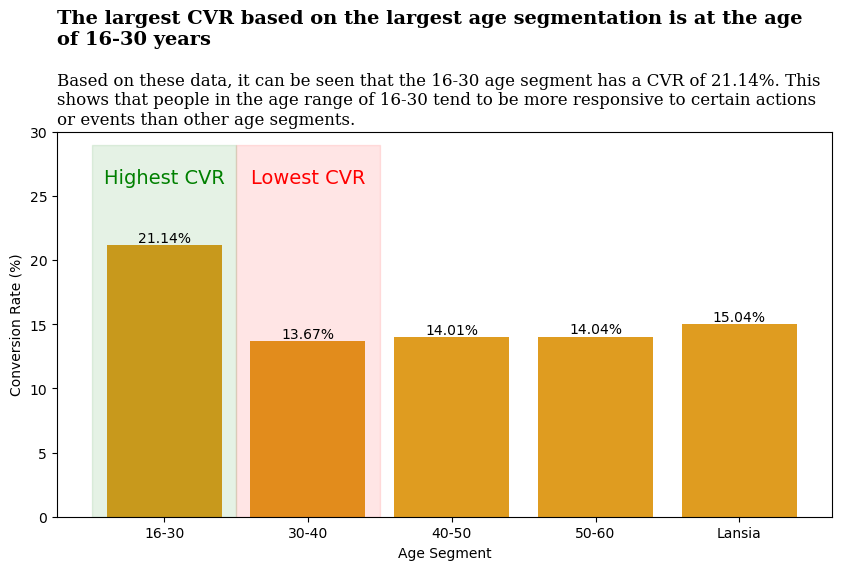

In [14]:
plt.figure(figsize=(10,5))
g = sns.barplot(x=x['Age_Segment'], y=x['conversion_rate'], data=x, color='orange')
plt.bar_label(g.containers[0], fmt='%.2f%%')
plt.ylim(0,30)
plt.xlabel('Age Segment')
plt.ylabel('Conversion Rate (%)')
plt.stackplot(np.arange(0.5,2), [29], color='red', alpha=0.1)
plt.text(x=1, y=26, s='Lowest CVR', color='red', fontsize=14, ha='center')
plt.stackplot(np.arange(-0.5,1), [29], color='green', alpha=0.1)
plt.text(x=0, y=26, s='Highest CVR', color='green', fontsize=14, ha='center')
plt.text(0, 1.228, 'The largest CVR based on the largest age segmentation is at the age\nof 16-30 years', ha='left',fontfamily='serif', fontsize=14, transform=plt.gca().transAxes, fontweight='bold')
plt.text(0, 1.02, 'Based on these data, it can be seen that the 16-30 age segment has a CVR of 21.14%. This\nshows that people in the age range of 16-30 tend to be more responsive to certain actions\nor events than other age segments.', ha='left',fontfamily='serif', fontsize=12, transform=plt.gca().transAxes)
plt.show()

In [15]:
y = df[['Income']]
y['Response'] = df['Response']

C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\1245351321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Response'] = df['Response']


In [16]:
y['segment_income'] = df['Income'].apply(lambda x: '0M-10M' if x <=10000000 else '10M-20M' if x <= 20000000 
                       else '30M-40M' if x <= 40000000 else '50M-60M' if x <= 60000000 
                       else '60M-70M' if x <= 70000000 else '70M-80M' if x <= 80000000 
                       else '80M-90M' if x <= 90000000 else '90M-100M' if x <= 100000000 else '>100M')

C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\1693162238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['segment_income'] = df['Income'].apply(lambda x: '0M-10M' if x <=10000000 else '10M-20M' if x <= 20000000


In [17]:
z = y[y['Response']==0].groupby(['segment_income'])['Response'].count().reset_index()
a = y[y['Response']==1].groupby(['segment_income'])['Response'].count().reset_index()
z['Respond'] = a['Response']
z = z.rename(columns={'Response':'Not_Respond'})
z['conversion_rate'] = z['Respond']/(z['Not_Respond']+z['Respond'])*100

In [18]:
z

,segment_income,Not_Respond,Respond,conversion_rate
0,0M-10M,25,3,10.714286
1,10M-20M,88,10,10.204082
2,30M-40M,533,72,11.900826
3,50M-60M,576,67,10.419907
4,60M-70M,294,39,11.711712
5,70M-80M,235,55,18.965517
6,80M-90M,100,61,37.888199
7,90M-100M,17,22,56.410256
8,>100M,27,5,15.625000


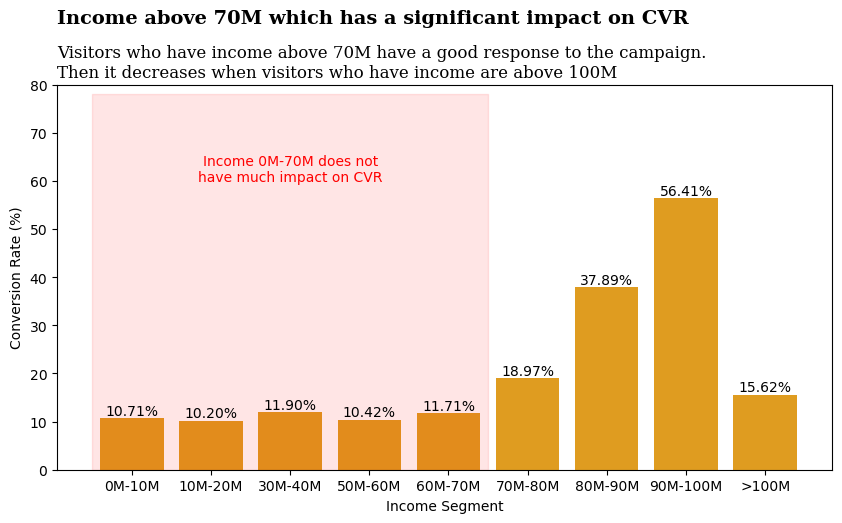

In [19]:
plt.figure(figsize=(10,5))
g = sns.barplot(x=z['segment_income'], y=z['conversion_rate'], data=z, color='orange')
plt.bar_label(g.containers[0], fmt='%.2f%%')
plt.ylim(0,80)
plt.xlabel('Income Segment')
plt.ylabel('Conversion Rate (%)')
plt.stackplot(np.arange(-0.5,5), [78], color='red', alpha=0.1)
plt.text(x=2, y=60, s='Income 0M-70M does not\nhave much impact on CVR', color='red', fontsize=10, ha='center')
plt.text(0, 1.16, 'Income above 70M which has a significant impact on CVR', ha='left',fontfamily='serif', fontsize=14, transform=plt.gca().transAxes, fontweight='bold')
plt.text(0, 1.02, 'Visitors who have income above 70M have a good response to the campaign.\nThen it decreases when visitors who have income are above 100M', ha='left',fontfamily='serif', fontsize=12, transform=plt.gca().transAxes)
plt.show()

In [20]:
y = df[['Total_Spents']]
y['Response'] = df['Response']
y['segment_spents'] = df['Total_Spents'].apply(lambda x: '0,0M-0,5M' if x <=500000 else '0,5M-1,0M' if x <= 1000000 else '1,0M-1,5M' if x <= 1500000
                       else '1,5M-2,0M' if x <= 2000000 else '>2,5M')

C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\379816320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Response'] = df['Response']
C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\379816320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['segment_spents'] = df['Total_Spents'].apply(lambda x: '0,0M-0,5M' if x <=500000 else '0,5M-1,0M' if x <= 1000000 else '1,0M-1,5M' if x <= 1500000


In [21]:
z = y[y['Response']==0].groupby(['segment_spents'])['Response'].count().reset_index()
a = y[y['Response']==1].groupby(['segment_spents'])['Response'].count().reset_index()
z['Respond'] = a['Response']
z = z.rename(columns={'Response':'Not_Respond'})
z['conversion_rate'] = z['Respond']/(z['Not_Respond']+z['Respond'])*100

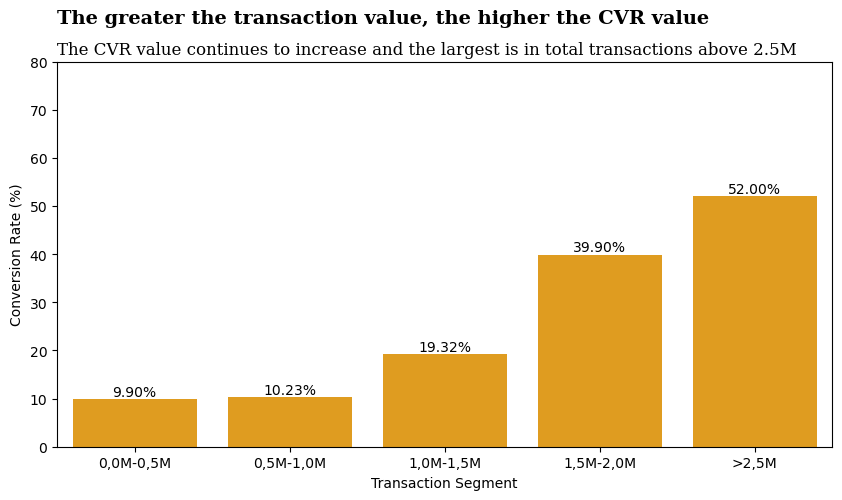

In [22]:
plt.figure(figsize=(10,5))
g = sns.barplot(x=z['segment_spents'], y=z['conversion_rate'], data=z, color='orange')
plt.bar_label(g.containers[0], fmt='%.2f%%')
plt.ylim(0,80)
plt.xlabel('Transaction Segment')
plt.ylabel('Conversion Rate (%)')
plt.text(0, 1.1, 'The greater the transaction value, the higher the CVR value', ha='left',fontfamily='serif', fontsize=14, transform=plt.gca().transAxes, fontweight='bold')
plt.text(0, 1.02, 'The CVR value continues to increase and the largest is in total transactions above 2.5M', ha='left',fontfamily='serif', fontsize=12, transform=plt.gca().transAxes)
plt.show()

# Data Cleaning & Preprocessing

In [23]:
df[['Age_Segment', 'Education', 'Marital_Status']]

,Age_Segment,Education,Marital_Status
0,50-60,S1,Lajang
1,50-60,S1,Lajang
2,40-50,S1,Bertunangan
3,16-30,S1,Bertunangan
4,30-40,S3,Menikah
...,...,...,...
2235,40-50,S1,Menikah
2236,Lansia,S3,Bertunangan
2237,30-40,S1,Cerai
2238,50-60,S2,Bertunangan


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  2229 non-null   int64   
 1   Age                 2229 non-null   int64   
 2   Children            2229 non-null   int64   
 3   Education           2229 non-null   object  
 4   Marital_Status      2229 non-null   object  
 5   Income              2206 non-null   float64 
 6   Dt_Customer         2229 non-null   int64   
 7   Recency             2229 non-null   int64   
 8   Total_Spents        2229 non-null   int64   
 9   Total_Transactions  2229 non-null   int64   
 10  NumWebVisitsMonth   2229 non-null   int64   
 11  Total_AcceptedCmp   2229 non-null   int64   
 12  Complain            2229 non-null   int64   
 13  Z_CostContact       2229 non-null   int64   
 14  Z_Revenue           2229 non-null   int64   
 15  Response            2229 non-null   in

## Handling Missing Values

In [25]:
edu_values = df['Education'].unique()
age_values = df['Age_Segment'].unique()

for edu in edu_values:
    for age in age_values:
        result = df['Income'].loc[(df['Education'] == edu) & (df['Age_Segment'] == age)].isnull().sum()
        print(f"nilai kosong dari {edu} - {age} adalah {result}")

nilai kosong dari S1 - 50-60 adalah 3
nilai kosong dari S1 - 40-50 adalah 3
nilai kosong dari S1 - 16-30 adalah 3
nilai kosong dari S1 - 30-40 adalah 1
nilai kosong dari S1 - Lansia adalah 1
nilai kosong dari S3 - 50-60 adalah 3
nilai kosong dari S3 - 40-50 adalah 1
nilai kosong dari S3 - 16-30 adalah 0
nilai kosong dari S3 - 30-40 adalah 1
nilai kosong dari S3 - Lansia adalah 0
nilai kosong dari S2 - 50-60 adalah 1
nilai kosong dari S2 - 40-50 adalah 2
nilai kosong dari S2 - 16-30 adalah 0
nilai kosong dari S2 - 30-40 adalah 1
nilai kosong dari S2 - Lansia adalah 1
nilai kosong dari SMA - 50-60 adalah 0
nilai kosong dari SMA - 40-50 adalah 0
nilai kosong dari SMA - 16-30 adalah 0
nilai kosong dari SMA - 30-40 adalah 0
nilai kosong dari SMA - Lansia adalah 0
nilai kosong dari D3 - 50-60 adalah 0
nilai kosong dari D3 - 40-50 adalah 1
nilai kosong dari D3 - 16-30 adalah 0
nilai kosong dari D3 - 30-40 adalah 1
nilai kosong dari D3 - Lansia adalah 0


In [26]:
for edu in edu_values:
   for age in age_values:
      idx = (df['Education'] == edu) & (df['Age_Segment'] == age) & (df['Income'].isnull())
      if idx.any():
         mean_income = df.loc[(df['Education']== edu) & (df['Age_Segment'] == age), 'Income'].mean()
         df.loc[idx, 'Income'] = mean_income
         print(f"{edu} - {age} di isi: {mean_income}")
      else:
         print (f"{edu} - {age} tidak dkosong")
      

S1 - 50-60 di isi: 57504832.61802575
S1 - 40-50 di isi: 51483233.22683706
S1 - 16-30 di isi: 47514496.93251534
S1 - 30-40 di isi: 51258618.58974359
S1 - Lansia di isi: 57204304.347826086
S3 - 50-60 di isi: 56860960.78431372
S3 - 40-50 di isi: 53225453.333333336
S3 - 16-30 tidak dkosong
S3 - 30-40 di isi: 53702130.841121495
S3 - Lansia tidak dkosong
S2 - 50-60 di isi: 57506602.27272727
S2 - 40-50 di isi: 51242562.5
S2 - 16-30 tidak dkosong
S2 - 30-40 di isi: 48446651.1627907
S2 - Lansia di isi: 58882361.70212766
SMA - 50-60 tidak dkosong
SMA - 40-50 tidak dkosong
SMA - 16-30 tidak dkosong
SMA - 30-40 tidak dkosong
SMA - Lansia tidak dkosong
D3 - 50-60 tidak dkosong
D3 - 40-50 di isi: 52019076.92307692
D3 - 16-30 tidak dkosong
D3 - 30-40 di isi: 41282532.46753247
D3 - Lansia tidak dkosong


In [27]:
for edu in edu_values:
    for age in age_values:
        result = df['Income'].loc[(df['Education'] == edu) & (df['Age_Segment'] == age)].isnull().sum()
        print(f"nilai kosong dari {edu} - {age} adalah {result}")

nilai kosong dari S1 - 50-60 adalah 0
nilai kosong dari S1 - 40-50 adalah 0
nilai kosong dari S1 - 16-30 adalah 0
nilai kosong dari S1 - 30-40 adalah 0
nilai kosong dari S1 - Lansia adalah 0
nilai kosong dari S3 - 50-60 adalah 0
nilai kosong dari S3 - 40-50 adalah 0
nilai kosong dari S3 - 16-30 adalah 0
nilai kosong dari S3 - 30-40 adalah 0
nilai kosong dari S3 - Lansia adalah 0
nilai kosong dari S2 - 50-60 adalah 0
nilai kosong dari S2 - 40-50 adalah 0
nilai kosong dari S2 - 16-30 adalah 0
nilai kosong dari S2 - 30-40 adalah 0
nilai kosong dari S2 - Lansia adalah 0
nilai kosong dari SMA - 50-60 adalah 0
nilai kosong dari SMA - 40-50 adalah 0
nilai kosong dari SMA - 16-30 adalah 0
nilai kosong dari SMA - 30-40 adalah 0
nilai kosong dari SMA - Lansia adalah 0
nilai kosong dari D3 - 50-60 adalah 0
nilai kosong dari D3 - 40-50 adalah 0
nilai kosong dari D3 - 16-30 adalah 0
nilai kosong dari D3 - 30-40 adalah 0
nilai kosong dari D3 - Lansia adalah 0


## Handling Duplicate Data

In [28]:
df = df.drop('ID', axis=1)
df.duplicated().sum()

183

In [29]:
df.drop_duplicates(inplace=True, keep='first')

In [30]:
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue', axis=1)

## Feature Encoding

In [31]:
df['Age_Segment'] = df['Age_Segment'].astype('object')

In [32]:
cat = df.select_dtypes(include=['object'])
num = df.select_dtypes(include=['int64', 'float64'])

In [33]:
for col in cat.columns:
    x = cat[col].value_counts()
    print(x)

S1     1027
S3      443
S2      341
D3      186
SMA      49
Name: Education, dtype: int64
Menikah        791
Bertunangan    518
Lajang         449
Cerai          215
Janda           70
Duda             3
Name: Marital_Status, dtype: int64
40-50     571
30-40     565
50-60     435
16-30     269
Lansia    206
Name: Age_Segment, dtype: int64


In [34]:
mapping_education = {'SMA':0, 'D3':1,'S1':2,'S2':3,'S3':4}
df['Education'] = df['Education'].map(mapping_education)

In [35]:
mapping_age_segment = {'50-60':0, '16-30':1,'30-40':2,'40-50':3,'Lansia':4}
df['Age_Segment'] = df['Age_Segment'].map(mapping_age_segment)

In [36]:
df = pd.get_dummies(df, columns=['Marital_Status'], prefix='status')

In [37]:
df[['Age_Segment','Education','status_Bertunangan','status_Cerai','status_Duda','status_Janda','status_Lajang','status_Menikah']].head(5)

,Age_Segment,Education,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah
0,0,2,0,0,0,0,1,0
1,0,2,0,0,0,0,1,0
2,3,2,1,0,0,0,0,0
3,1,2,1,0,0,0,0,0
4,2,4,0,0,0,0,0,1


## Feature Transfromation

In [38]:
q = df[['Income']]
q['Total_Spents'] = df['Total_Spents']
q['Dt_Customer'] = df['Dt_Customer']

C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\1930588114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q['Total_Spents'] = df['Total_Spents']
C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\1930588114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q['Dt_Customer'] = df['Dt_Customer']


In [39]:
df[['Income','Total_Spents','Dt_Customer']].head(5)

,Income,Total_Spents,Dt_Customer
0,58138000.0,1617000,2012
1,46344000.0,27000,2014
2,71613000.0,776000,2013
3,26646000.0,53000,2014
4,58293000.0,422000,2014


In [40]:
transfrom = StandardScaler()

df['Income'] = transfrom.fit_transform(df[['Income']])
df['Total_Spents'] = transfrom.fit_transform(df[['Total_Spents']])
df['Dt_Customer'] = transfrom.fit_transform(df[['Dt_Customer']])
df['Recency'] = transfrom.fit_transform(df[['Recency']])
'''df['Age'] = transfrom.fit_transform(df[['Age']])
df['Children'] = transfrom.fit_transform(df[['Children']])
df['Total_Transactions'] = transfrom.fit_transform(df[['Total_Transactions']])
df['NumWebVisitsMonth'] = transfrom.fit_transform(df[['NumWebVisitsMonth']])
df['Total_AcceptedCmp'] = transfrom.fit_transform(df[['Total_AcceptedCmp']])
df['Education'] = transfrom.fit_transform(df[['Education']])'''

"df['Age'] = transfrom.fit_transform(df[['Age']])\ndf['Children'] = transfrom.fit_transform(df[['Children']])\ndf['Total_Transactions'] = transfrom.fit_transform(df[['Total_Transactions']])\ndf['NumWebVisitsMonth'] = transfrom.fit_transform(df[['NumWebVisitsMonth']])\ndf['Total_AcceptedCmp'] = transfrom.fit_transform(df[['Total_AcceptedCmp']])\ndf['Education'] = transfrom.fit_transform(df[['Education']])"

In [41]:
df[['Income','Total_Spents','Dt_Customer']].head(5)

,Income,Total_Spents,Dt_Customer
0,0.241864,1.682545,-1.505593
1,-0.230842,-0.958489,1.417029
2,0.781944,0.285620,-0.044282
3,-1.020341,-0.915302,1.417029
4,0.248076,-0.302383,1.417029


# Data Modeling

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2046 non-null   int64  
 1   Children            2046 non-null   int64  
 2   Education           2046 non-null   int64  
 3   Income              2046 non-null   float64
 4   Dt_Customer         2046 non-null   float64
 5   Recency             2046 non-null   float64
 6   Total_Spents        2046 non-null   float64
 7   Total_Transactions  2046 non-null   int64  
 8   NumWebVisitsMonth   2046 non-null   int64  
 9   Total_AcceptedCmp   2046 non-null   int64  
 10  Complain            2046 non-null   int64  
 11  Response            2046 non-null   int64  
 12  Age_Segment         2046 non-null   int64  
 13  status_Bertunangan  2046 non-null   uint8  
 14  status_Cerai        2046 non-null   uint8  
 15  status_Duda         2046 non-null   uint8  
 16  status

In [43]:
df['status_Bertunangan'] = df['status_Bertunangan'].astype('float64')
df['status_Cerai'] = df['status_Cerai'].astype('float64')
df['status_Duda'] = df['status_Duda'].astype('float64')
df['status_Janda'] = df['status_Janda'].astype('float64')
df['status_Lajang'] = df['status_Lajang'].astype('float64')
df['status_Menikah'] = df['status_Menikah'].astype('float64')

In [44]:
inertia = []

for i in range(1, 10):
    x = KMeans(n_clusters=i, random_state=6396)
    x.fit(df.values)
    inertia.append(x.inertia_)

c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\goodb\anaconda3\lib\site-packages\sklearn\clust

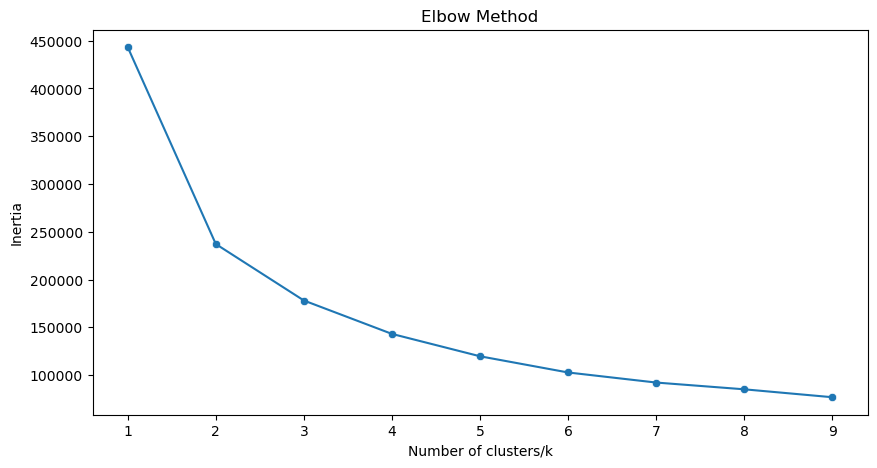

In [45]:

plt.figure(figsize=(10,5))
sns.lineplot(y = inertia, x=range(1, 10))
sns.scatterplot(y = inertia, x=range(1, 10))
plt.title('Elbow Method') 
plt.xlabel('Number of clusters/k')
plt.ylabel('Inertia')
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
# Tentukan parameter grid
param_grid = {'n_clusters': range(2, 11), 'init': ['k-means++', 'random']}
# Inisialisasi model
kmeans = KMeans(random_state=0)
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(kmeans, param_grid, cv=5,
scoring='adjusted_rand_score')
# Fit model dan cari hyperparameter optimal
grid_search.fit(df)
# Print hyperparameter terbaik
print('Best parameters: ', grid_search.best_params_)

c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\goodb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\goodb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\goodb\anaconda3\lib\site-packages\skle

Best parameters:  {'init': 'k-means++', 'n_clusters': 2}


In [47]:
kmeans = KMeans(n_clusters=2, random_state=6396)
kmeans.fit(df.values)
KMeans(n_clusters=2, random_state=6396)

c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=6396)

In [48]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
df['cluster'] = labels

## Silhouette plot

In [49]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
metrics.silhouette_score(df, labels, metric='euclidean')

0.3956140900544744

c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters = 2 , Silhouette Score = 0.3956140900544744


c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters = 3 , Silhouette Score = 0.35879322787577833


c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters = 4 , Silhouette Score = 0.33019385562409603


c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters = 5 , Silhouette Score = 0.32044280646458967


c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters = 6 , Silhouette Score = 0.30975926508270607


c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters = 7 , Silhouette Score = 0.3011323262363226


c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters = 8 , Silhouette Score = 0.29659627467050964


c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters = 9 , Silhouette Score = 0.2746386869900302


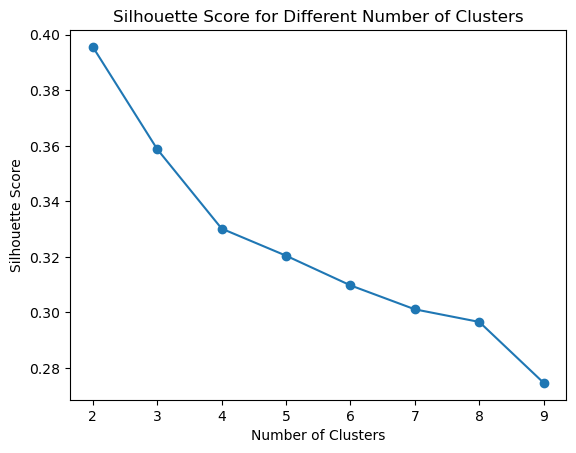

In [50]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

range_n_clusters = list(range(2,10))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=6396).fit(df)
    preds = kmeans.predict(df)
    labels_s = kmeans.labels_
    silhouette_score = metrics.silhouette_score(df, labels_s, metric='euclidean')
    arr_silhouette_score_euclidean.append(silhouette_score)
    print("Number of clusters =", i, ", Silhouette Score =", silhouette_score)

plt.plot(range_n_clusters, arr_silhouette_score_euclidean, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Number of Clusters")
plt.show()


c:\Users\goodb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_silhouette is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_silhouette instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


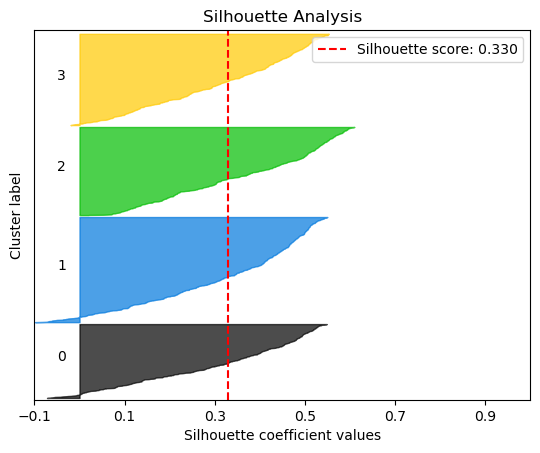

In [51]:
import scikitplot.plotters as skplt
kmeans = KMeans(n_clusters=4, random_state=6396)
skplt.plot_silhouette(kmeans, df)
plt.show()

In [52]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca.fit(df)
pcs = pca.transform(df)
final_pca = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2'])
final_pca['Cluster'] = labels
final_pca.head()

,PC1,PC2,Cluster
0,12.238079,8.134271,1
1,14.041108,-11.423570,1
2,4.822195,5.558390,1
3,-15.226275,-4.502967,0
4,-10.330942,5.932080,0


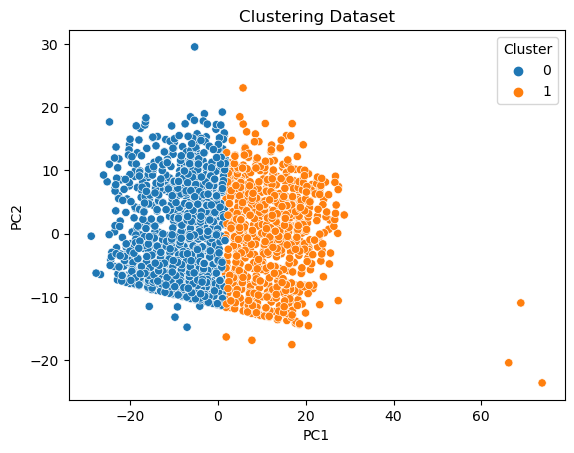

In [53]:
sns.scatterplot(x='PC1', y='PC2', data=final_pca, hue='Cluster')
plt.title('Clustering Dataset')
plt.show()

# Cluster Implementation

## CVR Based on Age

In [54]:
df['Income'] = q['Income']
df['Total_Spents'] = q['Total_Spents']
df['Dt_Customer'] = q['Dt_Customer']

In [55]:
x = df[df['Response']==0].groupby(['Age_Segment','cluster'])['Response'].count().reset_index()
y = df[df['Response']==1].groupby(['Age_Segment','cluster'])['Response'].count().reset_index()
x['Respond'] = y['Response']
x = x.rename(columns={'Response':'Not_Respond'})
x['conversion_rate'] = x['Respond']/(x['Not_Respond']+x['Respond'])*100

In [56]:
mapping_age_segment = {0:'50-60', 1:'16-30', 2:'30-40', 3:'40-50', 4:'Lansia'}
x['Age_Segment'] = x['Age_Segment'].map(mapping_age_segment)

In [57]:
x

,Age_Segment,cluster,Not_Respond,Respond,conversion_rate
0,50-60,1,373,62,14.252874
1,16-30,0,208,61,22.676580
2,30-40,0,490,75,13.274336
3,40-50,0,302,54,15.168539
4,40-50,1,186,29,13.488372
5,Lansia,1,175,31,15.048544


<AxesSubplot:xlabel='Age_Segment', ylabel='conversion_rate'>

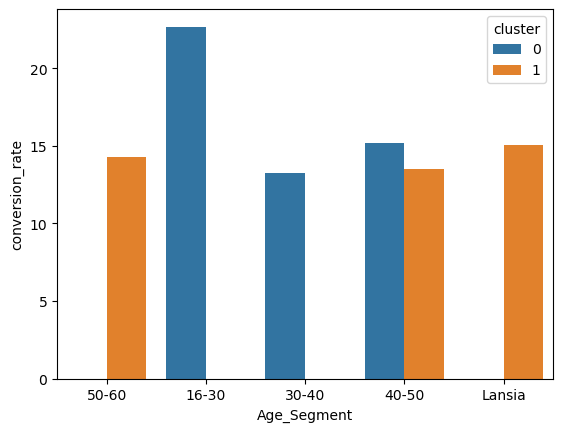

In [58]:
sns.barplot(x='Age_Segment', y='conversion_rate', data=x, hue='cluster')


## CVR based on Income

In [59]:
y = df[['Income']]
y['Response'] = df['Response']
y['cluster'] = df['cluster']

C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\3473306064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Response'] = df['Response']
C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\3473306064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['cluster'] = df['cluster']


In [60]:
y['segment_income'] = df['Income'].apply(lambda x: '0M-10M' if x <=10000000 else '10M-20M' if x <= 20000000 
                       else '30M-40M' if x <= 40000000 else '50M-60M' if x <= 60000000 
                       else '60M-70M' if x <= 70000000 else '70M-80M' if x <= 80000000 
                       else '80M-90M' if x <= 90000000 else '90M-100M' if x <= 100000000 else '>100M')

C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\1693162238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['segment_income'] = df['Income'].apply(lambda x: '0M-10M' if x <=10000000 else '10M-20M' if x <= 20000000


In [61]:
z = y[y['Response']==0].groupby(['segment_income','cluster'])['Response'].count().reset_index()
a = y[y['Response']==1].groupby(['segment_income','cluster'])['Response'].count().reset_index()
z['Respond'] = a['Response']
z = z.rename(columns={'Response':'Not_Respond'})
z['conversion_rate'] = z['Respond']/(z['Not_Respond']+z['Respond'])*100

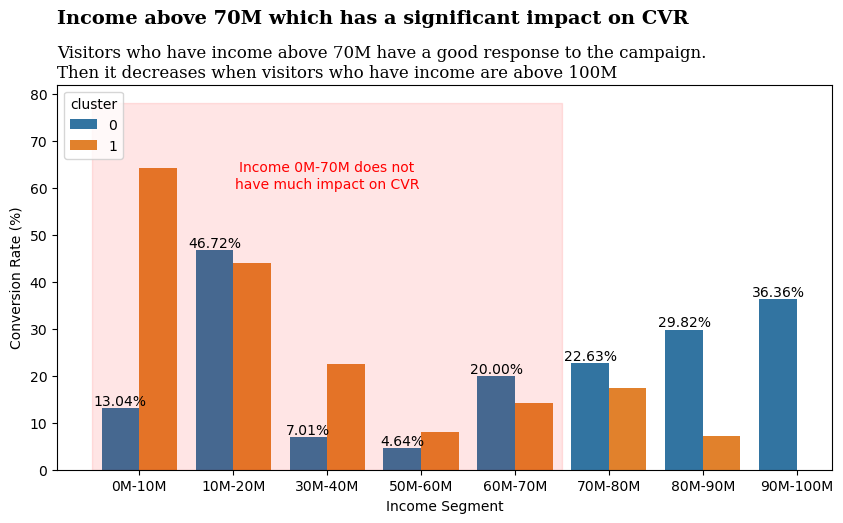

In [62]:
plt.figure(figsize=(10,5))
g = sns.barplot(x=z['segment_income'], y=z['conversion_rate'], data=z, hue = 'cluster')
plt.bar_label(g.containers[0], fmt='%.2f%%')
plt.xlabel('Income Segment')
plt.ylabel('Conversion Rate (%)')
plt.stackplot(np.arange(-0.5,5), [78], color='red', alpha=0.1)
plt.text(x=2, y=60, s='Income 0M-70M does not\nhave much impact on CVR', color='red', fontsize=10, ha='center')
plt.text(0, 1.16, 'Income above 70M which has a significant impact on CVR', ha='left',fontfamily='serif', fontsize=14, transform=plt.gca().transAxes, fontweight='bold')
plt.text(0, 1.02, 'Visitors who have income above 70M have a good response to the campaign.\nThen it decreases when visitors who have income are above 100M', ha='left',fontfamily='serif', fontsize=12, transform=plt.gca().transAxes)
plt.show()

## CVR based on number of children

In [66]:
y = df[['Children']]
y['cluster'] = df['cluster']
y['Response'] = df['Response']

C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\4118755141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['cluster'] = df['cluster']
C:\Users\goodb\AppData\Local\Temp\ipykernel_20568\4118755141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Response'] = df['Response']


In [67]:
z = y[y['Response']==0].groupby(['Children','cluster'])['Response'].count().reset_index()
a = y[y['Response']==1].groupby(['Children','cluster'])['Response'].count().reset_index()
z['Respond'] = a['Response']
z = z.rename(columns={'Response':'Not_Respond'})
z['conversion_rate'] = z['Respond']/(z['Not_Respond']+z['Respond'])*100

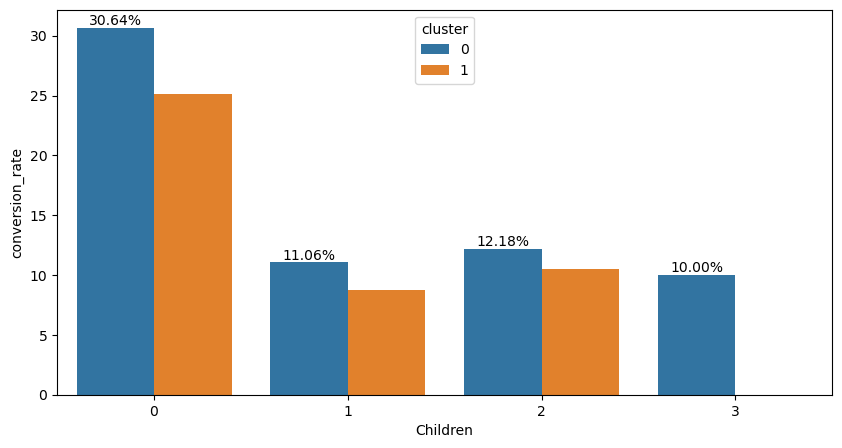

In [68]:
plt.figure(figsize=(10,5))
g = sns.barplot(x=z['Children'], y=z['conversion_rate'], data=z, hue='cluster')
plt.bar_label(g.containers[0], fmt='%.2f%%')
plt.show()

In [69]:
df

,Age,Children,Education,Income,Dt_Customer,Recency,Total_Spents,Total_Transactions,NumWebVisitsMonth,Total_AcceptedCmp,Complain,Response,Age_Segment,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,cluster
0,55,0,2,58138000.0,2012,0.313551,1617000,25,7,0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,60,2,2,46344000.0,2014,-0.377115,27000,6,5,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,48,0,2,71613000.0,2013,-0.791514,776000,21,4,0,0,0,3,1.0,0.0,0.0,0.0,0.0,0.0,1
3,30,1,2,26646000.0,2014,-0.791514,53000,8,6,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0
4,33,1,4,58293000.0,2014,1.556749,422000,19,5,0,0,0,2,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,36,1,2,666666000.0,2013,-0.895114,62000,11,6,0,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0
2235,46,1,2,61223000.0,2013,-0.100849,1341000,18,5,0,0,0,3,0.0,0.0,0.0,0.0,0.0,1.0,1
2237,33,0,2,56981000.0,2014,1.453149,1241000,19,6,1,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0
2238,58,1,3,69245000.0,2014,-1.413114,843000,23,3,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1
